# Simple GLM with pymc3
## Overview
This is a very simple example of Bayesian regression using pymc3 using the GLM class. This allows us to mimic the non-Bayesian code for simple regression, without having to write out a full probability model with priors. 

## References

- [Thomas Wiecki blog](https://twiecki.io/blog/2013/08/12/bayesian-glms-1/)

In [3]:
from dataclasses import dataclass 

import pymc3 as pm 
import numpy as np 
import matplotlib.pyplot as plt

In [12]:
@dataclass
class Params: 
    alpha: float = 1
    beta: float = 2
    sigma: float = 1 
    num_records: int = 200 

params = Params()

In [30]:
X = np.linspace(0, 1, params.num_records)
true_regression_line = params.alpha + params.beta * X
y =  true_regression_line + np.random.normal(scale=params.sigma, size=params.num_records)

data = dict(x=X, y=y)

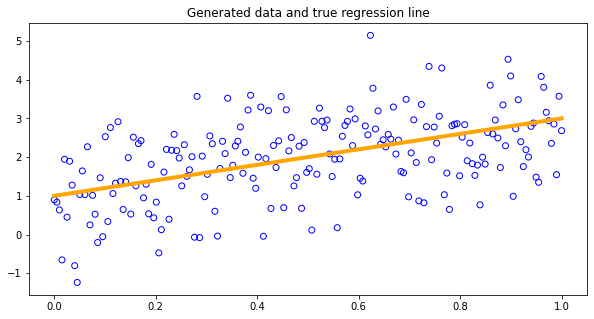

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X, y, facecolors='none', edgecolors='b')
ax.plot(X, true_regression_line, lw=4, color='orange')
ax.set_title('Generated data and true regression line');

In [35]:
with pm.Model() as model: 
    pm.GLM.from_formula('y~X', data=data)
    trace = pm.sample(tune=1000, progressbar=True, return_inferencedata=False, chains=4)

/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


<Figure size 720x720 with 0 Axes>

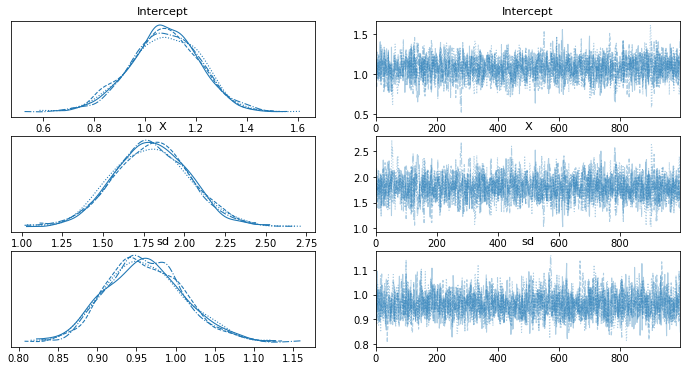

In [41]:
plt.figure(figsize=(10,10))
pm.plot_trace(trace);